# Kernel Alignment

This notebook was intended just to see what kernel alignment does to the feature maps. It tries to implement what is shown here: https://qiskit.org/ecosystem/machine-learning/tutorials/08_quantum_kernel_trainer.html by adding rotation gates on the qubits before the feature map. Below are some visuals of what the quantum feature space looks like with this rotation. 

The intent here is to understand what the alignment is doing. In short, it can be thought of as rotating the feature space slightly such that the shapes/patterns in the feature space align better with the problem data distributoin.

In [3]:
import logging
import sys
from typing import Callable, Dict, List, Optional, Tuple


logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logger = logging.getLogger()
logger.info("Setting up logger for notebook.")

INFO:root:Setting up logger for notebook.


In [1]:
import numpy as np
x1s = np.linspace(-1, 1, 100)
x2s = np.linspace(-1, 1, 100)
x1s_grid, x2s_grid = np.meshgrid(x1s, x2s)

## Original Color Map

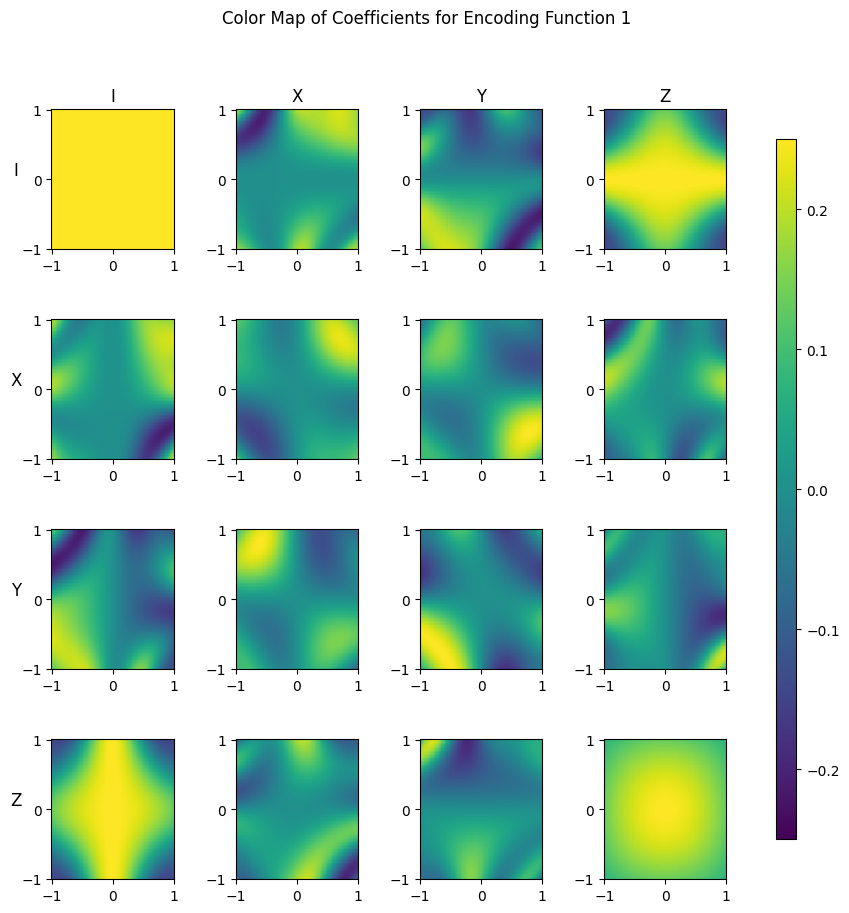

In [2]:
import matplotlib.pyplot as plt
from feature_maps import encoding_fns
from minimum_accuracy import coefficients

# Feature Map 1
fm1_x12s_grid = encoding_fns['encoding_fn_1'] (x1s_grid, x2s_grid)

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i in np.arange(4):
    for j in np.arange(4):
        idx = i*4 + j
        pauli_matrix = list(coefficients.keys())[idx]
        aixs = coefficients[pauli_matrix](x1s_grid, x2s_grid, fm1_x12s_grid)
        heatmap = axs[i, j].pcolor(x1s, x2s, aixs, vmin=-0.25, vmax=0.25)
        axs[i, j].set_xticks([-1, 0, 1])
        axs[i, j].set_yticks([-1, 0, 1])

        # Set some grid axes up
        if i == 0:
            axs[i, j].set_title(pauli_matrix[0])
        if j == 0:
            axs[i, j].set_ylabel(pauli_matrix[1], rotation=0, size='large')

fig.subplots_adjust(right=0.8, wspace=0.5, hspace=0.5)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(heatmap, cax=cbar_ax)
fig.suptitle('Color Map of Coefficients for Encoding Function 1')


plt.show()

##  Rotation of $\pi$

In [6]:
from itertools import product

x1s = np.linspace(-1, 1, 100)
x2s = np.linspace(-1, 1, 100)
ds = np.array(list(product(x1s, x2s)))

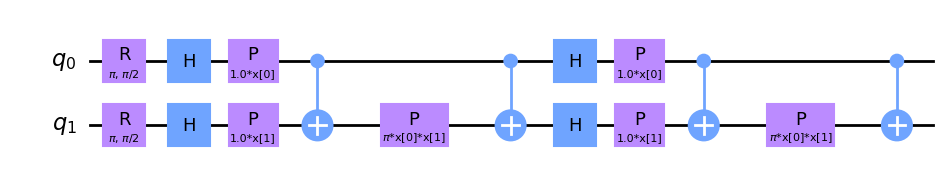

In [37]:
from feature_maps import param_circuit
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

training_params = ParameterVector("a", 1)
fm0 = QuantumCircuit(2)
fm0.ry(training_params[0], 0)
fm0.ry(training_params[0], 1)

fm0 = fm0.bind_parameters(np.array([np.pi]))


# Get our regular feature map
fm1 = param_circuit(encoding_fn=encoding_fns['encoding_fn_1'])

# # Create the feature map, composed of our two circuits
fm = fm0.compose(fm1)
fm.decompose().draw()

INFO:root:computing coefficients for 0
INFO:root:computing coefficients for 1
INFO:root:computing coefficients for 2
INFO:root:computing coefficients for 3
INFO:root:computing coefficients for 4
INFO:root:computing coefficients for 5
INFO:root:computing coefficients for 6
INFO:root:computing coefficients for 7
INFO:root:computing coefficients for 8
INFO:root:computing coefficients for 9
INFO:root:computing coefficients for 10
INFO:root:computing coefficients for 11
INFO:root:computing coefficients for 12
INFO:root:computing coefficients for 13
INFO:root:computing coefficients for 14
INFO:root:computing coefficients for 15


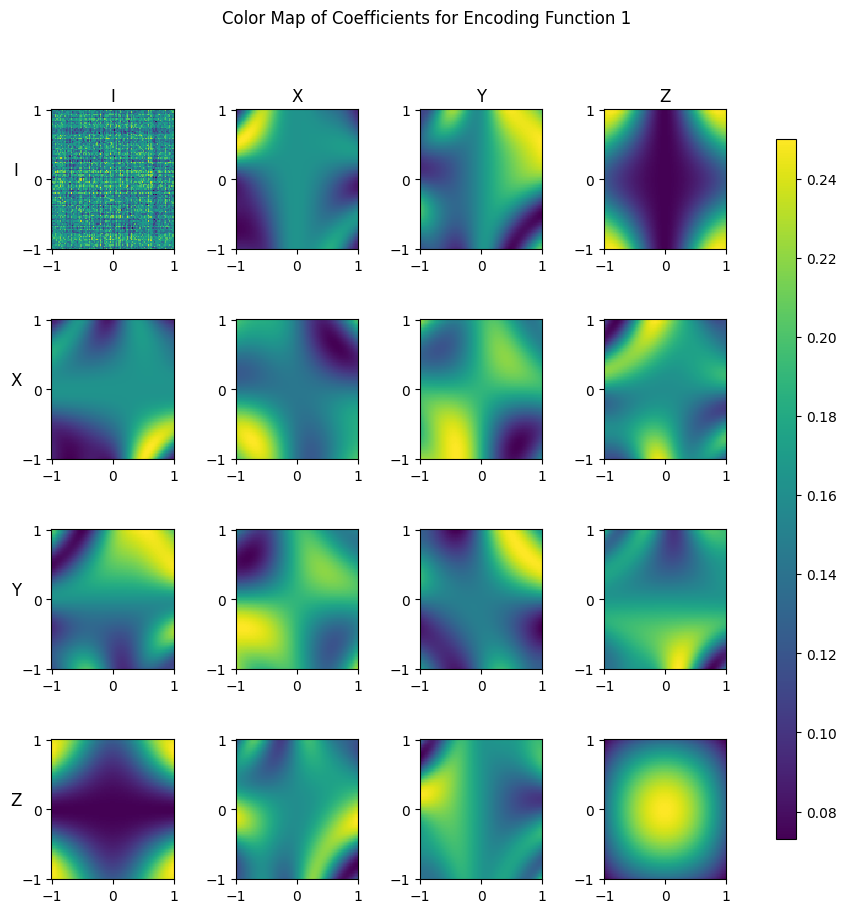

In [38]:
# Feature Map 1
from minimum_accuracy import compute_pauli_decomposition


fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i in np.arange(4):
    for j in np.arange(4):
        idx = i*4 + j
        logger.info(f"computing coefficients for {idx}")
        pauli_matrix = list(coefficients.keys())[idx]
        aixs = compute_pauli_decomposition(ds=ds, feature_map=fm, axes=[idx])
        heatmap = axs[i, j].pcolor(x1s, x2s, aixs.reshape(100, 100))
        axs[i, j].set_xticks([-1, 0, 1])
        axs[i, j].set_yticks([-1, 0, 1])

        # Set some grid axes up
        if i == 0:
            axs[i, j].set_title(pauli_matrix[0])
        if j == 0:
            axs[i, j].set_ylabel(pauli_matrix[1], rotation=0, size='large')

fig.subplots_adjust(right=0.8, wspace=0.5, hspace=0.5)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(heatmap, cax=cbar_ax)
fig.suptitle('Color Map of Coefficients for Encoding Function 1')


plt.show()

## Rotation of $\pi/2$

INFO:root:computing coefficients for 0
INFO:root:computing coefficients for 1
INFO:root:computing coefficients for 2
INFO:root:computing coefficients for 3
INFO:root:computing coefficients for 4
INFO:root:computing coefficients for 5
INFO:root:computing coefficients for 6
INFO:root:computing coefficients for 7
INFO:root:computing coefficients for 8
INFO:root:computing coefficients for 9
INFO:root:computing coefficients for 10
INFO:root:computing coefficients for 11
INFO:root:computing coefficients for 12
INFO:root:computing coefficients for 13
INFO:root:computing coefficients for 14
INFO:root:computing coefficients for 15


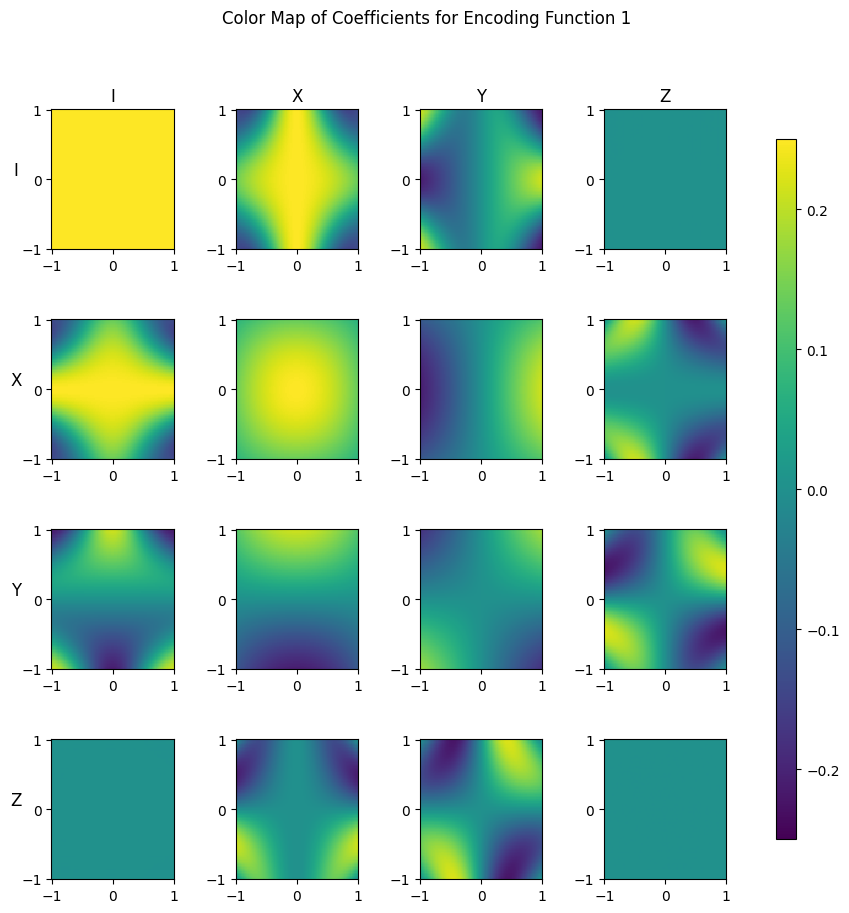

In [40]:
training_params = ParameterVector("a", 1)
fm0 = QuantumCircuit(2)
fm0.ry(training_params[0], 0)
fm0.ry(training_params[0], 1)

fm0 = fm0.bind_parameters(np.array([np.pi/2]))


# Get our regular feature map
fm1 = param_circuit(encoding_fn=encoding_fns['encoding_fn_1'])

# # Create the feature map, composed of our two circuits
fm = fm0.compose(fm1)

# Feature Map 1
from minimum_accuracy import compute_pauli_decomposition


fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i in np.arange(4):
    for j in np.arange(4):
        idx = i*4 + j
        logger.info(f"computing coefficients for {idx}")
        pauli_matrix = list(coefficients.keys())[idx]
        aixs = compute_pauli_decomposition(ds=ds, feature_map=fm, axes=[idx])
        heatmap = axs[i, j].pcolor(x1s, x2s, aixs.reshape(100, 100), vmin=-0.25, vmax=0.25)
        axs[i, j].set_xticks([-1, 0, 1])
        axs[i, j].set_yticks([-1, 0, 1])

        # Set some grid axes up
        if i == 0:
            axs[i, j].set_title(pauli_matrix[0])
        if j == 0:
            axs[i, j].set_ylabel(pauli_matrix[1], rotation=0, size='large')

fig.subplots_adjust(right=0.8, wspace=0.5, hspace=0.5)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(heatmap, cax=cbar_ax)
fig.suptitle('Color Map of Coefficients for Encoding Function 1')


plt.show()

## Rotation of $\pi/4$

INFO:root:computing coefficients for 0
INFO:root:computing coefficients for 1
INFO:root:computing coefficients for 2
INFO:root:computing coefficients for 3
INFO:root:computing coefficients for 4
INFO:root:computing coefficients for 5
INFO:root:computing coefficients for 6
INFO:root:computing coefficients for 7
INFO:root:computing coefficients for 8
INFO:root:computing coefficients for 9
INFO:root:computing coefficients for 10
INFO:root:computing coefficients for 11
INFO:root:computing coefficients for 12
INFO:root:computing coefficients for 13
INFO:root:computing coefficients for 14
INFO:root:computing coefficients for 15


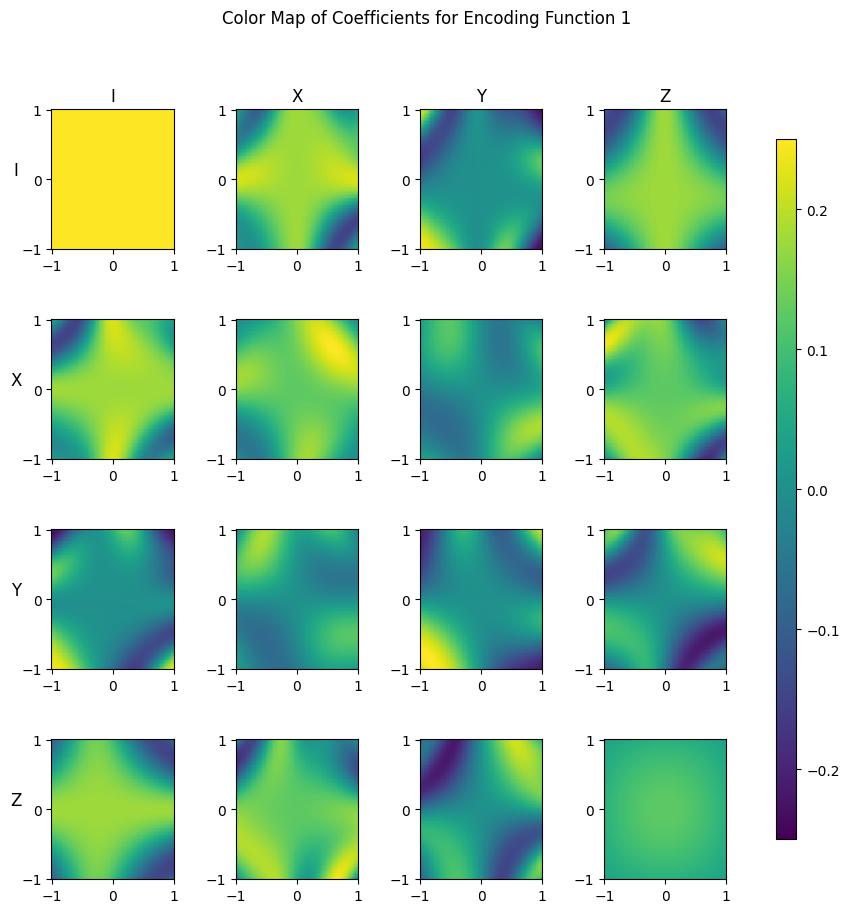

In [41]:
training_params = ParameterVector("a", 1)
fm0 = QuantumCircuit(2)
fm0.ry(training_params[0], 0)
fm0.ry(training_params[0], 1)

fm0 = fm0.bind_parameters(np.array([np.pi/4]))


# Get our regular feature map
fm1 = param_circuit(encoding_fn=encoding_fns['encoding_fn_1'])

# # Create the feature map, composed of our two circuits
fm = fm0.compose(fm1)

# Feature Map 1
from minimum_accuracy import compute_pauli_decomposition


fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i in np.arange(4):
    for j in np.arange(4):
        idx = i*4 + j
        logger.info(f"computing coefficients for {idx}")
        pauli_matrix = list(coefficients.keys())[idx]
        aixs = compute_pauli_decomposition(ds=ds, feature_map=fm, axes=[idx])
        heatmap = axs[i, j].pcolor(x1s, x2s, aixs.reshape(100, 100), vmin=-0.25, vmax=0.25)
        axs[i, j].set_xticks([-1, 0, 1])
        axs[i, j].set_yticks([-1, 0, 1])

        # Set some grid axes up
        if i == 0:
            axs[i, j].set_title(pauli_matrix[0])
        if j == 0:
            axs[i, j].set_ylabel(pauli_matrix[1], rotation=0, size='large')

fig.subplots_adjust(right=0.8, wspace=0.5, hspace=0.5)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(heatmap, cax=cbar_ax)
fig.suptitle('Color Map of Coefficients for Encoding Function 1')


plt.show()

## Rotation of $\pi/8$

INFO:root:computing coefficients for 0
INFO:root:computing coefficients for 1
INFO:root:computing coefficients for 2
INFO:root:computing coefficients for 3
INFO:root:computing coefficients for 4
INFO:root:computing coefficients for 5
INFO:root:computing coefficients for 6
INFO:root:computing coefficients for 7
INFO:root:computing coefficients for 8
INFO:root:computing coefficients for 9
INFO:root:computing coefficients for 10
INFO:root:computing coefficients for 11
INFO:root:computing coefficients for 12
INFO:root:computing coefficients for 13
INFO:root:computing coefficients for 14
INFO:root:computing coefficients for 15


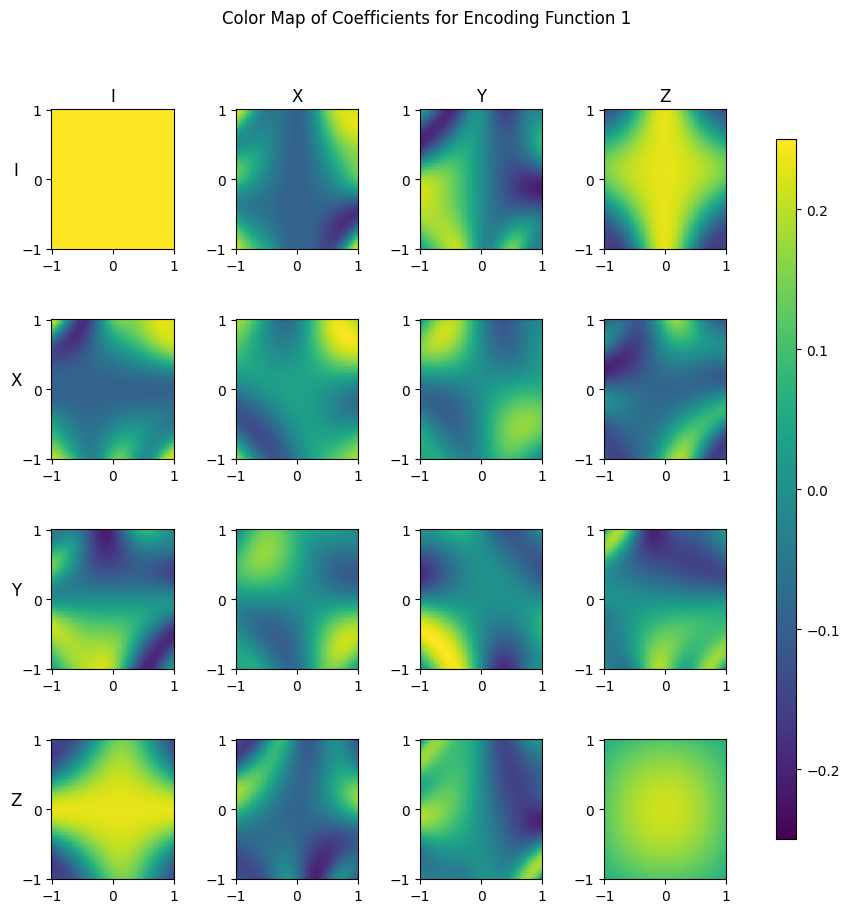

In [43]:
training_params = ParameterVector("a", 1)
fm0 = QuantumCircuit(2)
fm0.ry(training_params[0], 0)
fm0.ry(training_params[0], 1)

fm0 = fm0.bind_parameters(np.array([-np.pi/8]))


# Get our regular feature map
fm1 = param_circuit(encoding_fn=encoding_fns['encoding_fn_1'])

# # Create the feature map, composed of our two circuits
fm = fm0.compose(fm1)

# Feature Map 1
from minimum_accuracy import compute_pauli_decomposition


fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i in np.arange(4):
    for j in np.arange(4):
        idx = i*4 + j
        logger.info(f"computing coefficients for {idx}")
        pauli_matrix = list(coefficients.keys())[idx]
        aixs = compute_pauli_decomposition(ds=ds, feature_map=fm, axes=[idx])
        heatmap = axs[i, j].pcolor(x1s, x2s, aixs.reshape(100, 100), vmin=-0.25, vmax=0.25)
        axs[i, j].set_xticks([-1, 0, 1])
        axs[i, j].set_yticks([-1, 0, 1])

        # Set some grid axes up
        if i == 0:
            axs[i, j].set_title(pauli_matrix[0])
        if j == 0:
            axs[i, j].set_ylabel(pauli_matrix[1], rotation=0, size='large')

fig.subplots_adjust(right=0.8, wspace=0.5, hspace=0.5)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(heatmap, cax=cbar_ax)
fig.suptitle('Color Map of Coefficients for Encoding Function 1')


plt.show()